In [1]:
import os
os.chdir(os.path.abspath(".."))


## Setup
First of all, check the Python version. This sources have been coded with the following Python version:

In [2]:
!python --version

Python 3.11.2


Then, install the dependencies in the `requirement.txt` file. The main dependency is the python packege `bcause` (https://github.com/PGM-Lab/bcause).

In [3]:
!pip install --upgrade pip setuptools wheel
!pip install -r ./requirements.txt

  Cloning https://github.com/PGM-Lab/bcause (to revision dev-czeros) to /private/var/folders/f5/bp1mbmt10w1f_m23nwfgsn_h0000gn/T/pip-install-durg3lby/bcause_91c59d3c1d914041aa5d2fc3cc780b05
  Running command git clone --filter=blob:none --quiet https://github.com/PGM-Lab/bcause /private/var/folders/f5/bp1mbmt10w1f_m23nwfgsn_h0000gn/T/pip-install-durg3lby/bcause_91c59d3c1d914041aa5d2fc3cc780b05
  Running command git checkout -b dev-czeros --track origin/dev-czeros
  Switched to a new branch 'dev-czeros'
  branch 'dev-czeros' set up to track 'origin/dev-czeros'.
  Resolved https://github.com/PGM-Lab/bcause to commit b264968827b601ce6cdd99cd8d1c023a6ae69199
  Preparing metadata (setup.py) ... done


## Model and data

In this repository, we provide functionality for preprocessing the model and data so they could work we our inference algorithm:

In [4]:
from ctfzeros.prepro import load_and_preprocess

In [5]:
filepath = "./models/synthetic/simple_nparents2_nzr04_zdr05_10.uai"
datapath = "./models/synthetic/simple_nparents2_nzr04_zdr05_10.csv"

model, data, _, _ = load_and_preprocess(filepath, datapath)
model

<StructuralCausalModel (Y:2,X2:2,X1:2|Uy:14,Ux1:2,Ux2:2), dag=[Uy][Y|Uy:X2:X1][X2|Ux2][X1|Ux1][Ux1][Ux2]>

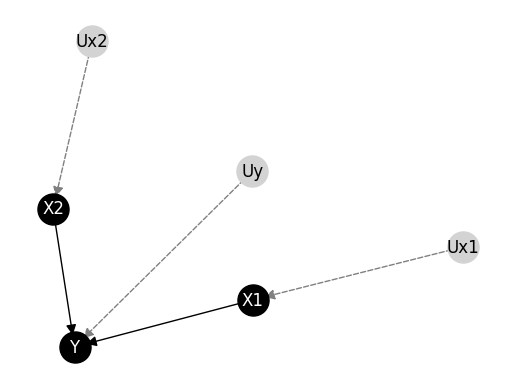

In [6]:
model.draw()

In [7]:
data

,X2,X1,Y
0,0,1,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
995,0,1,1
996,0,0,1
997,1,0,1
998,0,0,0


## Counterfactual inference

First, load corresponding modules for using DCCC and EMCC:

In [8]:
from ctfzeros.divideconquer import DCCC_inverted_tree
from bcause.inference.causal.multi import EMCC

Set up the DCCC inference engine with a number of solutions $N=20$. Then calculate the probability of sufficiency $PS(X_2,Y)$:

In [9]:
infDCCC = DCCC_inverted_tree(model, data, num_runs=20)
infDCCC.prob_sufficiency("X2","Y")

[0.8247598578471568, 1.0]

Similarly, with the state of the art method EMCC interating up to 100 iterations each EM run.

In [10]:
infEMCC = EMCC(model,data,num_runs=20, max_iter=100)
infEMCC.prob_sufficiency("X2","Y")


[0.9327744350475523, 0.9957323609245537]